In [5]:
import pickle as pi
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [6]:
with open ('NHANES.pickle','rb')as f:
    data = pi.load(f)

In [7]:
pd.DataFrame(data) #To view variables in a clear fashion

,2011_2012,2013_2014,2009_2010
Consumer Behavior,SEQN CBD070 CBD090 CBD110 CBD12...,SEQN CBD070 CBD090 CBD110 CBD120...,SEQN CBD010 CBQ020 CBQ030 CBQ040...
Immunization,SEQN IMQ011 IMQ020 IMQ040 IMQ070 ...,SEQN IMQ011 IMQ020 IMQ040 IMQ070...,SEQN IMQ011 IMQ020 IMQ040 IMQ045...
Prescription Medication,SEQN RXDUSE RXDDRUG...,SEQN RXDUSE RXDDRUG RXDDR...,SEQN RXDUSE RXDDRUG...
Drug Use,SEQN DUQ200 DUQ210 DUQ211 DUQ213 ...,SEQN DUQ200 DUQ210 DUQ211 DUQ213 ...,SEQN DUQ200 DUQ210 DUQ211 DUQ213 ...
Physical Function,SEQN PFQ020 PFQ030 PFQ041 PFQ049 ...,SEQN PFQ020 PFQ030 PFQ033 PFQ041 ...,SEQN PFQ020 PFQ030 PFQ041 PFQ049 ...
Smoking - Cigarette Use,SEQN SMQ020 SMD030 SMQ040 SMQ050Q...,SEQN SMQ020 SMD030 SMQ040 SMQ050Q...,SEQN SMQ020 SMD030 SMQ040 SMQ050Q...
Weight History,SEQN WHD010 WHD020 WHQ030 WHQ040 ...,SEQN WHD010 WHD020 WHQ030 WHQ040 ...,SEQN WHD010 WHD020 WHQ030 WHQ040 ...
Current Health Status,SEQN HSD010 HSQ470 HSQ480 HSQ490 ...,SEQN HSD010 HSQ500 HSQ510 HSQ520 ...,SEQN HSD010 HSQ470 HSQ480 HSQ490 ...
Housing Characteristics,SEQN HOD050 HOQ065 0 62161.0 ...,SEQN HOD050 HOQ065 0 73557.0 ...,SEQN HOQ040 HOD050 HOD060 HOQ065...
Volatile Toxicant,SEQN WTSVOC2Y VTQ210 VTQ220 ...,SEQN WTSVOC2Y VTQ210 VTQ220 ...,SEQN WTSVOC2Y VTQ210 VTQ220 ...


In [8]:
 hospital_09 = []  #This would be the Y variable aka what we are trying to predict. the number healthcare visits 
    
for i in data:
    if i =='2009_2010':
        hospital_09=data[i]['Hospital Utilization']['HUQ050']

hospital_11 = []
for i in data:
    if i =='2011_2012':
        hospital_11=data[i]['Hospital Utilization']['HUQ050']

hospital_13 = []
for i in data:
    if i =='2013_2014':
        hospital_13=data[i]['Hospital Utilization']['HUQ051']
        
Y2009 = hospital_09
Y2011 = hospital_11
Y2013 = hospital_13


hospital_11


0       2.0
1       2.0
2       2.0
3       1.0
4       1.0
       ... 
9751    1.0
9752    2.0
9753    2.0
9754    4.0
9755    0.0
Name: HUQ050, Length: 9756, dtype: float64

In [9]:
eatingout2009 = [] #Money spent on eating out

for i in data: 
    if i == '2009_2010':
        eatingout2009= data[i]['Consumer Behavior']['CBD120']

eatingout2011 = []

for i in data: 
    if i == '2011_2012':
        eatingout2011= data[i]['Consumer Behavior']['CBD120']

eatingout2013 = []

for i in data: 
    if i == '2013_2014':
        eatingout2013= data[i]['Consumer Behavior']['CBD120']

eatingout2009



eatingout2013

eatingout2011


0       999999.0
1           50.0
2           75.0
3          100.0
4           30.0
          ...   
9751        64.0
9752        20.0
9753       120.0
9754       150.0
9755         0.0
Name: CBD120, Length: 9756, dtype: float64

In [10]:
alcohol2009 = []   #How often drink alcohol over past 12 mos

for i in data: 
    if i == '2009_2010':
        alcohol2009= data[i]['Alcohol Use']['ALQ120Q']

alcohol2011 = []

for i in data:
    if i == '2011_2012':
        alcohol2011=data[i]['Alcohol Use']['ALQ120Q']


alcohol2013 = []

for i in data:
    if i == '2013_2014':
        alcohol2013=data[i]['Alcohol Use']['ALQ120Q']


alcohol2009
       
alcohol2013        
alcohol2011 

0       NaN
1       NaN
2       1.0
3       2.0
4       0.0
       ... 
5610    NaN
5611    4.0
5612    2.0
5613    NaN
5614    0.0
Name: ALQ120Q, Length: 5615, dtype: float64

In [11]:
health2009 = []  #General health condition rated 1-5 

for i in data: 
    if i == '2009_2010':
         health2009= data[i]['Current Health Status']['HSD010']

health2011 = []

for i in data:
    if i == '2011_2012':
        health2011=data[i]['Current Health Status']['HSD010']


health2013 = []

for i in data:
    if i == '2013_2014':
        health2013=data[i]['Current Health Status']['HSD010']

health2009

health2013
health2011

0       3.0
1       NaN
2       3.0
3       NaN
4       4.0
       ... 
8951    2.0
8952    2.0
8953    NaN
8954    3.0
8955    2.0
Name: HSD010, Length: 8956, dtype: float64

In [12]:
active2009 = []   #Days physically active at least 60 min

for i in data: 
    if i == '2009_2010':
         active2009= data[i]['Physical Activity']['PAQ706']

active2011 = []

for i in data:
    if i == '2011_2012':
        active2011=data[i]['Physical Activity']['PAQ706']


active2013 = []

for i in data:
    if i == '2013_2014':
        active2013=data[i]['Physical Activity']['PAQ706']

active2009

active2013
active2011

0       NaN
1       7.0
2       NaN
3       NaN
4       NaN
       ... 
9102    NaN
9103    NaN
9104    7.0
9105    NaN
9106    NaN
Name: PAQ706, Length: 9107, dtype: float64

In [13]:
sedentary2009 = []   #Minutes sedentary activity

for i in data: 
    if i == '2009_2010':
         sedentary2009= data[i]['Physical Activity']['PAD680']

sedentary2011 = []

for i in data:
    if i == '2011_2012':
        sedentary2011=data[i]['Physical Activity']['PAD680']


sedentary2013 = []

for i in data:
    if i == '2013_2014':
         sedentary2013=data[i]['Physical Activity']['PAD680']

sedentary2009

sedentary2013
sedentary2011

0       300.0
1         NaN
2       720.0
3       300.0
4       600.0
        ...  
9102    720.0
9103    600.0
9104      NaN
9105    480.0
9106    660.0
Name: PAD680, Length: 9107, dtype: float64

In [14]:
diabetes2009 = []   #Doctor told you have diabetes

for i in data:
    if i=='2009_2010':
        diabetes2009=data[i]['Diabetes']['DIQ010']

diabetes2011 = []        
        
for i in data:
    if i=='2011_2012':
        diabetes2011=data[i]['Diabetes']['DIQ010']        
        
diabetes2013 = []

for i in data:
    if i=='2013_2014':
        diabetes2013=data[i]['Diabetes']['DIQ010']

diabetes2009

diabetes2013
diabetes2011

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
9359    2.0
9360    2.0
9361    2.0
9362    1.0
9363    2.0
Name: DIQ010, Length: 9364, dtype: float64

In [15]:
kidney2009 = []   #Doctor told you have weak Kidneys

for i in data:
    if i=='2009_2010':
        kidney2009=data[i]['Kidney and Urologic Conditions']['KIQ022']

kidney2011 = []        
        
for i in data:
    if i=='2011_2012':
         kidney2011=data[i]['Kidney and Urologic Conditions']['KIQ022']       
        
kidney2013 = []

for i in data:
    if i=='2013_2014':
        kidney2013=data[i]['Kidney and Urologic Conditions']['KIQ022']

kidney2013
kidney2009
kidney2011

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
5555    2.0
5556    2.0
5557    2.0
5558    2.0
5559    2.0
Name: KIQ022, Length: 5560, dtype: float64

In [16]:
protection2009 = []   ## times had sex without condom/year

for i in data:
    if i=='2009_2010':
        protection2009=data[i]['Sexual Behavior']['SXQ251']

protection2011 = []        
        
for i in data:
    if i=='2011_2012':
         protection2011=data[i]['Sexual Behavior']['SXQ251']       
        
protection2013 = []

for i in data:
    if i=='2013_2014':
        protection2013=data[i]['Sexual Behavior']['SXQ251']

protection2009

protection2013
protection2011


0       NaN
1       NaN
2       NaN
3       3.0
4       2.0
       ... 
4791    NaN
4792    5.0
4793    NaN
4794    NaN
4795    NaN
Name: SXQ251, Length: 4796, dtype: float64

In [17]:
sleep2009 = []   #How much sleep do you get (hours)?

for i in data:
    if i=='2009_2010':
        sleep2009=data[i]['Sleep Disorders']['SLD010H']

sleep2011 = []        
        
for i in data:
    if i=='2011_2012':
         sleep2011=data[i]['Sleep Disorders']['SLD010H']       
        
sleep2013 = []

for i in data:
    if i=='2013_2014':
        sleep2013=data[i]['Sleep Disorders']['SLD010H']

sleep2009

sleep2013
sleep2011

0       8.0
1       8.0
2       8.0
3       8.0
4       9.0
       ... 
6170    6.0
6171    8.0
6172    9.0
6173    6.0
6174    8.0
Name: SLD010H, Length: 6175, dtype: float64

In [18]:
weight2009 = []   #Self-reported weight - 1 yr ago (pounds)

for i in data:
    if i=='2009_2010':
        weight2009=data[i]['Weight History']['WHD020']

weight2011 = []        
        
for i in data:
    if i=='2011_2012':
         weight2011=data[i]['Weight History']['WHD020']       
        
weight2013 = []

for i in data:
    if i=='2013_2014':
        weight2013=data[i]['Weight History']['WHD020'] 

weight2009

weight2013

weight2011

0       150.0
1       139.0
2       120.0
3       203.0
4       211.0
        ...  
6170    215.0
6171    190.0
6172    122.0
6173    175.0
6174    110.0
Name: WHD020, Length: 6175, dtype: float64

In [19]:
Column_names = ['weight', 'sleep', 'protection', 'kidney', 'diabetes', 'sedentary', 'active', 'health', 'alcohol', 'eatingout', 'hospital']

In [20]:
dataframe2009_2010 = pd.concat([weight2009,sleep2009,protection2009,kidney2009,diabetes2009,sedentary2009,active2009,health2009,alcohol2009,eatingout2009,hospital_09], axis=1) #Pre-Cleaning 2009_2010 dataframe

dataframe2011_2012 = pd.concat([weight2011,sleep2011,protection2011,kidney2011,diabetes2011,sedentary2011,active2011,health2011,alcohol2011,eatingout2011,hospital_11], axis=1) #Pre-Cleaning 2011_2012 dataframe

dataframe2013_2014 = pd.concat([weight2013,sleep2013,protection2013,kidney2013,diabetes2013,sedentary2013,active2013,health2013,alcohol2013, eatingout2013,hospital_13], axis=1) #Pre-Cleaning 2013_2014 dataframe


In [21]:
dataframe2009_2010.columns = Column_names
dataframe2011_2012.columns = Column_names
dataframe2013_2014.columns = Column_names

In [22]:
dataframe2011_2012

,weight,sleep,protection,kidney,diabetes,sedentary,active,health,alcohol,eatingout,hospital
0,150.0,8.0,NaN,2.0,2.0,300.0,NaN,3.0,NaN,999999.0,2.0
1,139.0,8.0,NaN,2.0,2.0,NaN,7.0,NaN,NaN,50.0,2.0
2,120.0,8.0,NaN,2.0,2.0,720.0,NaN,3.0,1.0,75.0,2.0
3,203.0,8.0,3.0,2.0,2.0,300.0,NaN,NaN,2.0,100.0,1.0
4,211.0,9.0,2.0,2.0,2.0,600.0,NaN,4.0,0.0,30.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,1.0
9752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,2.0
9753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,2.0
9754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,4.0


In [23]:
dataframe2009_2010.isnull().mean() # Tells me how many nulls are in each column

weight        0.352282
sleep         0.346873
protection    0.714055
kidney        0.409889
diabetes      0.040619
sedentary     0.288792
active        0.788555
health        0.377622
alcohol       0.558508
eatingout     0.010439
hospital      0.000000
dtype: float64

In [24]:
dataframe2011_2012.isnull().mean()

weight        0.370541
sleep         0.367979
protection    0.734112
kidney        0.430197
diabetes      0.040283
sedentary     0.305761
active        0.764248
health        0.396064
alcohol       0.570726
eatingout     0.005228
hospital      0.000000
dtype: float64

In [25]:
dataframe2013_2014.isnull().mean()

weight        0.368059
sleep         0.365012
protection    0.712432
kidney        0.433022
diabetes      0.039902
sedentary     0.298378
active        0.706241
health        0.364423
alcohol       0.559803
eatingout     0.012088
hospital      0.000000
dtype: float64

In [26]:
imputer = SimpleImputer(missing_values= np.nan, strategy = 'median') #If I wanted to populate on median for 1 column such as "Median $$ spent eating out" to eliminate Big spenders from driving the avg high. I'd do this

In [27]:
eatingout2009_2 = pd.DataFrame(eatingout2009) #Creating new Dataframe with just the column I want to transform, since this column will be treated different.
eatingout2011_2 = pd.DataFrame(eatingout2011)
eatingout2013_2 = pd.DataFrame(eatingout2013)

In [28]:
imputer.fit(eatingout2009_2) #Fitting imputer to use median
imputer.fit(eatingout2011_2)
imputer.fit(eatingout2013_2)

SimpleImputer(strategy='median')

In [29]:
eatingout2009_3 = imputer.transform(eatingout2009_2) #Transforming the column and populating with Medians, then storing as a new column.
eatingout2011_3 = imputer.transform(eatingout2011_2)
eatingout2013_3 = imputer.transform(eatingout2013_2)

In [30]:
EOCol09 = ['Eatingout2009'] #Creating some column names so it's easier to find. Can do this for the entire dataframe as well.
EOCol11 = ['Eatingout2011']
EOCol13 = ['Eatingout2013']

In [31]:
eatingout2009_4 = pd.DataFrame(data = eatingout2009_3, columns = EOCol09) #Finally storing these columns as dataframes to then replace in my master dataframe
eatingout2011_4 = pd.DataFrame(data = eatingout2011_3, columns = EOCol11)
eatingout2013_4 = pd.DataFrame(data = eatingout2013_3, columns = EOCol13)

In [32]:
dataframe2009_2010 = pd.concat([weight2009,sleep2009,protection2009,kidney2009,diabetes2009,sedentary2009,active2009,health2009,alcohol2009,eatingout2009_4,hospital_09],axis=1) #replaced eating out

dataframe2011_2012 = pd.concat([weight2011,sleep2011,protection2011,kidney2011,diabetes2011,sedentary2011,active2011,health2011,alcohol2011,eatingout2011_4,hospital_11],axis=1) #This can be done for each column I wish to treat differently and not use the averages

dataframe2013_2014 = pd.concat([weight2013,sleep2013,protection2013,kidney2013,diabetes2013,sedentary2013,active2013,health2013,alcohol2013, eatingout2013_4,hospital_13],axis=1) 


In [33]:
dataframe2009_2010.columns = Column_names #reassign names
dataframe2011_2012.columns = Column_names
dataframe2013_2014.columns = Column_names

In [34]:
dataframe2013_2014.isnull().mean() #As we can see with this test, eatingout now has no null values and I can proceed to replace the rest

weight        0.368059
sleep         0.365012
protection    0.712432
kidney        0.433022
diabetes      0.039902
sedentary     0.298378
active        0.706241
health        0.364423
alcohol       0.559803
eatingout     0.000000
hospital      0.000000
dtype: float64

In [35]:
imputer = SimpleImputer(missing_values= np.nan, strategy = 'mean') #I want to change the strategy now for mean because I want to use that for the rest of populating

In [36]:
imputer.fit(dataframe2009_2010) #preparing my dataframes
imputer.fit(dataframe2011_2012)
imputer.fit(dataframe2013_2014)

SimpleImputer()

In [37]:
transdata2009 = imputer.transform(dataframe2009_2010) #Replacing the blank values with the average value and storing as an array.
transdata2011 = imputer.transform(dataframe2011_2012) 
transdata2013 = imputer.transform(dataframe2013_2014) 

In [38]:
dataframe2009 = pd.DataFrame(transdata2009) #2009 data with N/A's replaced
dataframe2011 = pd.DataFrame(transdata2011) #2011 data with N/A's replaced
dataframe2013 = pd.DataFrame(transdata2013) #2013 data with N/A's replaced

In [39]:
dataframe2009.columns = Column_names #reassign names
dataframe2011.columns = Column_names
dataframe2013.columns = Column_names

In [40]:
dataframe2013 #Quick look at 2013 data

,weight,sleep,protection,kidney,diabetes,sedentary,active,health,alcohol,eatingout,hospital
0,180.000000,7.000000,3.373548,2.000000,1.000000,600.000000,5.802275,2.000000,1.00000,0.0,5.0
1,200.000000,9.000000,5.000000,2.000000,1.000000,540.000000,5.802275,4.000000,7.00000,40.0,5.0
2,195.000000,8.000000,3.373548,1.000000,1.000000,300.000000,5.802275,3.000000,0.00000,40.0,2.0
3,120.000000,9.000000,3.373548,1.000000,2.000000,478.548956,5.000000,2.768053,0.00000,50.0,1.0
4,235.000000,5.000000,3.373548,2.000000,2.000000,480.000000,5.802275,5.000000,5.00000,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
10170,254.215863,7.050302,3.373548,1.977292,1.947589,478.548956,5.802275,2.768053,4.70931,800.0,1.0
10171,254.215863,7.050302,3.373548,1.977292,1.947589,478.548956,5.802275,2.768053,4.70931,120.0,0.0
10172,254.215863,7.050302,3.373548,1.977292,1.947589,478.548956,5.802275,2.768053,4.70931,45.0,5.0
10173,254.215863,7.050302,3.373548,1.977292,1.947589,478.548956,5.802275,2.768053,4.70931,30.0,0.0


In [41]:
dataframe2009.isnull().mean() #quick check

weight        0.0
sleep         0.0
protection    0.0
kidney        0.0
diabetes      0.0
sedentary     0.0
active        0.0
health        0.0
alcohol       0.0
eatingout     0.0
hospital      0.0
dtype: float64

In [42]:
dataframe2011.isnull().mean() #quick check

weight        0.0
sleep         0.0
protection    0.0
kidney        0.0
diabetes      0.0
sedentary     0.0
active        0.0
health        0.0
alcohol       0.0
eatingout     0.0
hospital      0.0
dtype: float64

In [43]:
dataframe2013.isnull().mean() #quick check

weight        0.0
sleep         0.0
protection    0.0
kidney        0.0
diabetes      0.0
sedentary     0.0
active        0.0
health        0.0
alcohol       0.0
eatingout     0.0
hospital      0.0
dtype: float64

In [44]:
from sklearn import linear_model

In [45]:
reg = linear_model.Ridge(alpha=.5) #create our alpha for the regression

In [46]:
#create the X and Y variables for our 2009 regression
X = dataframe2009[['weight','sleep','protection','kidney','diabetes','sedentary','active','health','alcohol','eatingout']].astype(float)
Y = dataframe2009["hospital"].values

In [47]:
reg.fit(X,Y) #create the regression

Ridge(alpha=0.5)

In [48]:
reg.coef_ #coefficients for each X variable for 2009 data

array([-1.66630596e-05, -5.79140717e-03, -4.19030417e-02, -2.44404627e-02,
        3.69367252e-02,  7.06084307e-05, -4.74586670e-03, -1.62925944e-03,
       -6.73517721e-04,  1.13187316e-06])

In [49]:
reg.intercept_ #intercept for 2009 data

2.352123094379169

In [50]:
#create the X and Y variables for our  2011 regression
X1 = dataframe2011[['weight','sleep','protection','kidney','diabetes','sedentary','active','health','alcohol','eatingout']].astype(float)
Y1 = dataframe2011["hospital"].values

In [51]:
reg.fit(X1,Y1) #create the regression

Ridge(alpha=0.5)

In [52]:
reg.coef_ #coefficients foreach X variable in 2011 data

array([-8.58652269e-06,  4.99881453e-03,  2.24928270e-02,  7.44274602e-02,
       -9.59254567e-02, -7.18204896e-05, -1.29844232e-02,  1.26843994e-02,
        5.04612119e-05,  1.83822019e-07])

In [53]:
reg.intercept_ #intercept for 2011 data

2.1447070762746123

In [60]:
import matplotlib.pyplot as plt

In [55]:
#create our X and Y variables for our 2013 regression
X2 = dataframe2013[['weight','sleep','protection','kidney','diabetes','sedentary','active','health','alcohol','eatingout']].astype(float)
Y2 = dataframe2013["hospital"].values

In [56]:
reg.fit(X2,Y2) #create the regression

Ridge(alpha=0.5)

In [57]:
reg.coef_ #coefficients for each X variable in 2013 data

array([ 2.11620599e-04,  5.81377432e-03, -4.67216574e-02, -7.10430079e-03,
        4.31538764e-02,  6.75252817e-06, -2.93251361e-03,  1.38678088e-02,
       -1.02534721e-03,  4.28746185e-07])

In [58]:
reg.intercept_ #intercept for 2013 data

2.454393210651645

(0.0, 100.0)

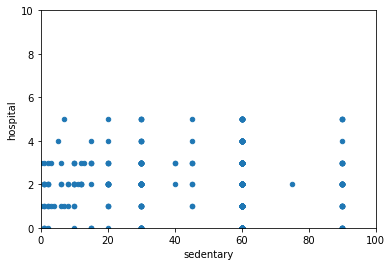

In [69]:
dataframe2009.plot.scatter('sedentary', 'hospital')   #Extra Credit #When comparing the scatter plots for all three years, we can see there is no corelation between the amount of sedentary activity and healthcare visits.
plt.ylim([0, 10])
plt.xlim([0, 100])  


(0.0, 100.0)

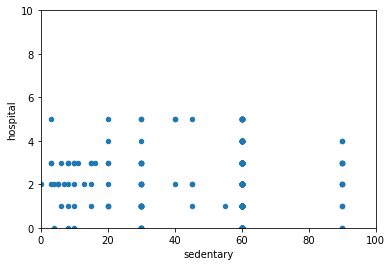

In [70]:
dataframe2011.plot.scatter('sedentary', 'hospital')
plt.ylim([0, 10])
plt.xlim([0, 100])

(0.0, 100.0)

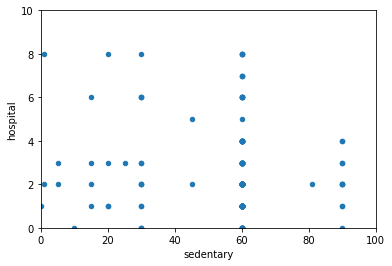

In [71]:
dataframe2013.plot.scatter('sedentary', 'hospital')
plt.ylim([0, 10])
plt.xlim([0, 100])